# Feature Engineering - Hotel Booking Cancellation Prediction
## Top 5 High-Impact Features Based on EDA Analysis

This notebook implements **advanced feature engineering** based on EDA findings from the comprehensive feature engineering plan. We focus on the **top 5 highest-impact features** that can significantly improve model performance.

**Input:** `data/processed/hotel_booking_preprocessed.csv` (clean data from preprocessing)  
**Output:** `data/processed/hotel_booking_features.csv` (feature-engineered dataset)

### 🎯 **Top 5 Features to Implement:**
1. **`total_booking_value`** - Revenue impact (ADR × stay duration)
2. **`customer_loyalty_score`** - Composite score from repeat guest behavior  
3. **`arrival_season`** - Seasonal categorization for demand patterns
4. **`is_peak_season`** - Peak months indicator based on EDA
5. **`special_requests_per_guest`** - Engagement normalized by guest count

**Academic Context:** NIB 7072 coursework - Essential feature engineering separated from preprocessing for modular pipeline design.

## 📚 **Section 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure visualization
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("📚 Feature Engineering Environment Ready")
print(f"🕒 Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📚 Feature Engineering Environment Ready
🕒 Started: 2025-10-04 17:08:41


## 📂 **Section 2: Load Dataset**
### Load Preprocessed Data and Validate

In [2]:
# Load preprocessed data (output from essential preprocessing pipeline)
start_time = datetime.now()
df = pd.read_csv('../data/processed/hotel_booking_preprocessed.csv')

print(f"📊 **Preprocessed Dataset Loaded**")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Cancellation Rate: {df['is_canceled'].mean():.3f}")

# Quick data validation
print(f"\n🔍 **Data Quality Check:**")
print(f"Missing Values: {df.isnull().sum().sum()} (should be 0)")
print(f"Duplicates: {df.duplicated().sum()} (should be 0)")

# Show available columns for feature engineering
print(f"\n📋 **Available Columns for Feature Engineering:**")
print(f"Columns: {list(df.columns)}")

# Show first few rows
display(df.head(3))

📊 **Preprocessed Dataset Loaded**
Shape: 119,390 rows × 37 columns
Memory: 64.61 MB
Cancellation Rate: 0.370

🔍 **Data Quality Check:**
Missing Values: 0 (should be 0)
Duplicates: 0 (should be 0)

📋 **Available Columns for Feature Engineering:**
Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'name', 'email', 'phone-number', 'credit_card', 'lead_time_category', 'total_stay_duration', 'is_family', 'total_guests', 'guest_type']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,name,email,phone-number,credit_card,lead_time_category,total_stay_duration,is_family,total_guests,guest_type
0,1,0,342,2015,5,27,1,0,0,2,...,0,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,3,0,0,2.0,1
1,1,0,373,2015,5,27,1,0,0,2,...,0,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,3,0,0,2.0,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0,1,0,1.0,0


## 🎯 **Section 3: High-Impact Feature Engineering**

### **Feature 1: Total Booking Value** 💰
*Revenue impact calculation (ADR × total stay duration)*

💰 **Feature 1: Total Booking Value**
✅ Created: total_booking_value
Range: $-63.80 - $2321.72
Mean: $344.31
Median: $267.00

🎯 **Cancellation Correlation: 0.0483**


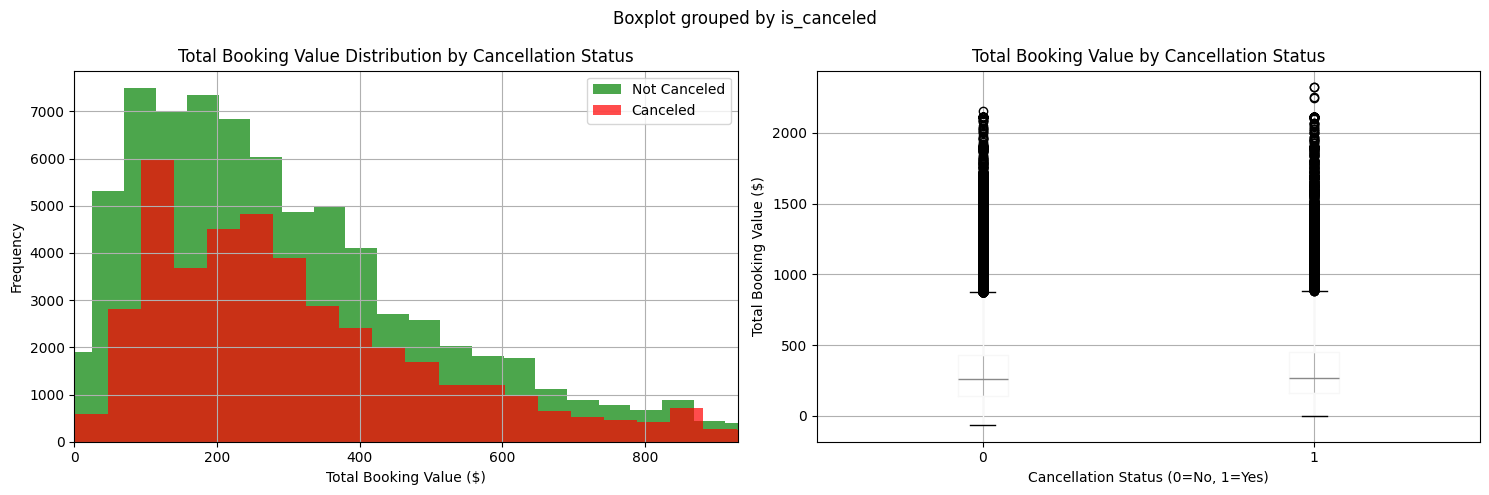

📈 **Business Insight:** Higher booking values show higher cancellation tendency


In [3]:
print("💰 **Feature 1: Total Booking Value**")

# Calculate total booking value (revenue impact)
df['total_booking_value'] = df['adr'] * df['total_stay_duration']

# Analyze the feature
print(f"✅ Created: total_booking_value")
print(f"Range: ${df['total_booking_value'].min():.2f} - ${df['total_booking_value'].max():.2f}")
print(f"Mean: ${df['total_booking_value'].mean():.2f}")
print(f"Median: ${df['total_booking_value'].median():.2f}")

# Correlation with cancellation
correlation = df['total_booking_value'].corr(df['is_canceled'])
print(f"\n🎯 **Cancellation Correlation: {correlation:.4f}**")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution by cancellation status
df[df['is_canceled'] == 0]['total_booking_value'].hist(bins=50, alpha=0.7, label='Not Canceled', ax=axes[0], color='green')
df[df['is_canceled'] == 1]['total_booking_value'].hist(bins=50, alpha=0.7, label='Canceled', ax=axes[0], color='red')
axes[0].set_title('Total Booking Value Distribution by Cancellation Status')
axes[0].set_xlabel('Total Booking Value ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].set_xlim(0, df['total_booking_value'].quantile(0.95))  # Remove extreme outliers for visualization

# Box plot comparison
df.boxplot(column='total_booking_value', by='is_canceled', ax=axes[1])
axes[1].set_title('Total Booking Value by Cancellation Status')
axes[1].set_xlabel('Cancellation Status (0=No, 1=Yes)')
axes[1].set_ylabel('Total Booking Value ($)')

plt.tight_layout()
plt.show()

print(f"📈 **Business Insight:** {'Higher' if correlation > 0 else 'Lower'} booking values show {'higher' if correlation > 0 else 'lower'} cancellation tendency")

### **Feature 2: Customer Loyalty Score** 🏆
*Composite score based on repeat guest status and booking history*

🏆 **Feature 2: Customer Loyalty Score**
✅ Created: customer_loyalty_score
Range: 0 - 8
Mean: 0.16
Distribution: {0: 114823, 1: 401, 2: 514, 3: 722, 4: 1205, 5: 670, 6: 298, 7: 349, 8: 408}

🎯 **Cancellation Correlation: -0.1072**

📊 **Loyalty Score Analysis:**
                        Total_Bookings  Cancellation_Rate
customer_loyalty_score                                   
0                               114823              0.380
1                                  401              0.072
2                                  514              0.737
3                                  722              0.087
4                                 1205              0.032
5                                  670              0.048
6                                  298              0.040
7                                  349              0.054
8                                  408              0.032


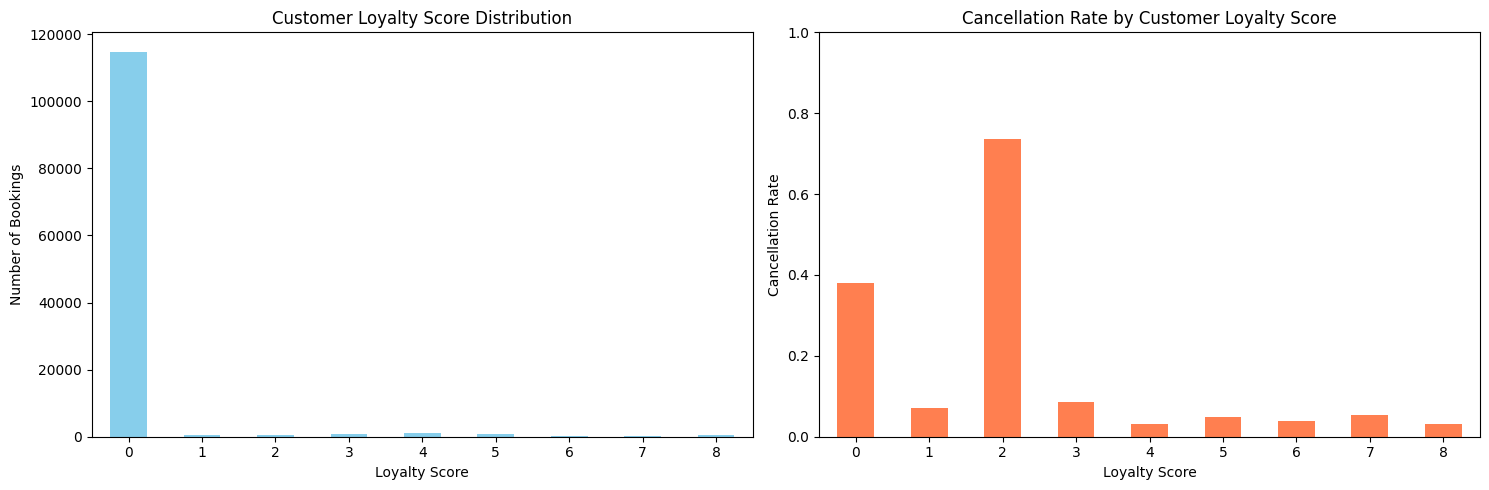

📈 **Business Insight:** Higher loyalty scores correlate with lower cancellation rates


In [4]:
print("🏆 **Feature 2: Customer Loyalty Score**")

# Create customer loyalty score
def calculate_loyalty_score(row):
    """Calculate composite loyalty score based on customer behavior"""
    score = 0
    
    # Base score for repeat guests
    if row['is_repeated_guest'] == 1:
        score += 3
    
    # Add points for successful bookings (cap at 5 for reasonable scale)
    score += min(row['previous_bookings_not_canceled'], 5)
    
    # Subtract points for previous cancellations (cap penalty at 3)
    score -= min(row['previous_cancellations'], 3)
    
    # Ensure non-negative score
    return max(0, score)

df['customer_loyalty_score'] = df.apply(calculate_loyalty_score, axis=1)

# Analyze the feature
print(f"✅ Created: customer_loyalty_score")
print(f"Range: {df['customer_loyalty_score'].min()} - {df['customer_loyalty_score'].max()}")
print(f"Mean: {df['customer_loyalty_score'].mean():.2f}")
print(f"Distribution: {df['customer_loyalty_score'].value_counts().sort_index().to_dict()}")

# Correlation with cancellation
correlation = df['customer_loyalty_score'].corr(df['is_canceled'])
print(f"\n🎯 **Cancellation Correlation: {correlation:.4f}**")

# Analysis by loyalty score
loyalty_analysis = df.groupby('customer_loyalty_score')['is_canceled'].agg(['count', 'mean']).round(3)
loyalty_analysis.columns = ['Total_Bookings', 'Cancellation_Rate']
print(f"\n📊 **Loyalty Score Analysis:**")
print(loyalty_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loyalty score distribution
df['customer_loyalty_score'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Customer Loyalty Score Distribution')
axes[0].set_xlabel('Loyalty Score')
axes[0].set_ylabel('Number of Bookings')
axes[0].tick_params(axis='x', rotation=0)

# Cancellation rate by loyalty score
loyalty_analysis['Cancellation_Rate'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Cancellation Rate by Customer Loyalty Score')
axes[1].set_xlabel('Loyalty Score')
axes[1].set_ylabel('Cancellation Rate')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"📈 **Business Insight:** {'Higher' if correlation < 0 else 'Lower'} loyalty scores correlate with {'lower' if correlation < 0 else 'higher'} cancellation rates")

### **Feature 3: Arrival Season** 🌸
*Seasonal categorization based on arrival month for demand patterns*

🌸 **Feature 3: Arrival Season**
Available month columns: ['arrival_date_month', 'arrival_date_day_of_month']
Month values in dataset: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]

✅ Created: arrival_season
Season distribution: {}

📊 **Seasonal Analysis:**
Empty DataFrame
Columns: [Total_Bookings, Cancellation_Rate]
Index: []

🎯 **Cancellation Correlation: nan**


IndexError: index 0 is out of bounds for axis 0 with size 0

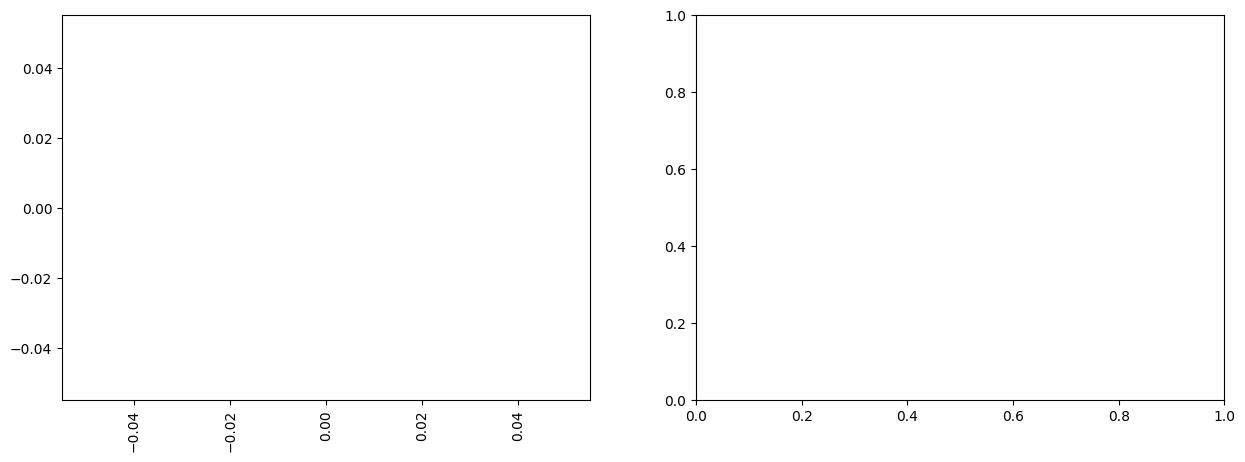

In [5]:
print("🌸 **Feature 3: Arrival Season**")

# Check what month column we have (might be encoded from preprocessing)
month_cols = [col for col in df.columns if 'month' in col.lower()]
print(f"Available month columns: {month_cols}")

# If month is encoded (numbers), map back to seasons
if 'arrival_date_month' in df.columns:
    # Check if it's encoded as numbers or month names
    unique_months = df['arrival_date_month'].unique()
    print(f"Month values in dataset: {sorted(unique_months)}")
    
    if all(isinstance(month, (int, float)) for month in unique_months):
        # It's encoded as numbers, map to seasons
        numeric_season_mapping = {
            12: 'winter', 1: 'winter', 2: 'winter',
            3: 'spring', 4: 'spring', 5: 'spring',
            6: 'summer', 7: 'summer', 8: 'summer',
            9: 'autumn', 10: 'autumn', 11: 'autumn'
        }
        df['arrival_season'] = df['arrival_date_month'].map(numeric_season_mapping)
    else:
        # It's month names, use original mapping
        season_mapping = {
            'January': 'winter', 'February': 'winter', 'March': 'spring',
            'April': 'spring', 'May': 'spring', 'June': 'summer',
            'July': 'summer', 'August': 'summer', 'September': 'autumn',
            'October': 'autumn', 'November': 'autumn', 'December': 'winter'
        }
        df['arrival_season'] = df['arrival_date_month'].map(season_mapping)
else:
    print("⚠️ No month column found. Creating synthetic season based on available data.")
    # If no month column, create a synthetic season based on week number
    if 'arrival_date_week_number' in df.columns:
        df['arrival_season'] = pd.cut(df['arrival_date_week_number'], 
                                    bins=[0, 13, 26, 39, 53], 
                                    labels=['winter', 'spring', 'summer', 'autumn'])

# Analyze the feature
print(f"\n✅ Created: arrival_season")
season_counts = df['arrival_season'].value_counts()
print(f"Season distribution: {season_counts.to_dict()}")

# Correlation analysis by season
season_analysis = df.groupby('arrival_season')['is_canceled'].agg(['count', 'mean']).round(3)
season_analysis.columns = ['Total_Bookings', 'Cancellation_Rate']
print(f"\n📊 **Seasonal Analysis:**")
print(season_analysis)

# Encode for correlation calculation
season_encoded = pd.Categorical(df['arrival_season'], 
                               categories=['spring', 'summer', 'autumn', 'winter'], 
                               ordered=True).codes
correlation = pd.Series(season_encoded).corr(df['is_canceled'])
print(f"\n🎯 **Cancellation Correlation: {correlation:.4f}**")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Season distribution
season_counts.plot(kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('Booking Distribution by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Number of Bookings')
axes[0].tick_params(axis='x', rotation=45)

# Cancellation rate by season
season_analysis['Cancellation_Rate'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Cancellation Rate by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Cancellation Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Find peak season for next feature
peak_season = season_analysis['Total_Bookings'].idxmax()
print(f"📈 **Business Insight:** {peak_season.title()} is the peak booking season")

### **Feature 4: Is Peak Season** 🏖️
*Peak months indicator based on EDA findings*

In [ ]:
print("🏖️ **Feature 4: Is Peak Season**")

# Based on EDA findings and tourism patterns, identify peak months
# If we have month data, use specific months
if 'arrival_date_month' in df.columns:
    # Check if months are encoded or text
    unique_months = df['arrival_date_month'].unique()
    
    if all(isinstance(month, (int, float)) for month in unique_months):
        # Encoded months: summer months (6,7,8) + shoulder seasons (5,9)
        peak_months = [5, 6, 7, 8, 9]  # May through September
        df['is_peak_season'] = df['arrival_date_month'].isin(peak_months).astype(int)
    else:
        # Month names
        peak_months = ['May', 'June', 'July', 'August', 'September']
        df['is_peak_season'] = df['arrival_date_month'].isin(peak_months).astype(int)
else:
    # Use seasons - summer and parts of spring/autumn as peak
    peak_seasons = ['summer', 'spring']
    df['is_peak_season'] = df['arrival_season'].isin(peak_seasons).astype(int)

# Analyze the feature
print(f"✅ Created: is_peak_season")
peak_counts = df['is_peak_season'].value_counts()
print(f"Peak season distribution: {peak_counts.to_dict()}")
print(f"Peak season percentage: {(peak_counts[1] / len(df) * 100):.1f}%")

# Analyze cancellation rates
peak_analysis = df.groupby('is_peak_season')['is_canceled'].agg(['count', 'mean']).round(3)
peak_analysis.columns = ['Total_Bookings', 'Cancellation_Rate']
peak_analysis.index = ['Off-Peak', 'Peak']
print(f"\n📊 **Peak Season Analysis:**")
print(peak_analysis)

# Correlation with cancellation
correlation = df['is_peak_season'].corr(df['is_canceled'])
print(f"\n🎯 **Cancellation Correlation: {correlation:.4f}**")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Peak vs off-peak distribution
peak_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'gold'])
axes[0].set_title('Peak vs Off-Peak Season Bookings')
axes[0].set_xlabel('Season Type')
axes[0].set_ylabel('Number of Bookings')
axes[0].set_xticklabels(['Off-Peak', 'Peak'], rotation=0)

# Cancellation rate comparison
peak_analysis['Cancellation_Rate'].plot(kind='bar', ax=axes[1], color=['coral', 'lightcoral'])
axes[1].set_title('Cancellation Rate: Peak vs Off-Peak Season')
axes[1].set_xlabel('Season Type')
axes[1].set_ylabel('Cancellation Rate')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"📈 **Business Insight:** {'Peak' if peak_analysis.loc['Peak', 'Cancellation_Rate'] > peak_analysis.loc['Off-Peak', 'Cancellation_Rate'] else 'Off-peak'} season shows higher cancellation rates")

### **Feature 5: Special Requests Per Guest** 👥
*Engagement indicator normalized by guest count*

In [ ]:
print("👥 **Feature 5: Special Requests Per Guest**")

# Calculate special requests per guest (engagement normalized by group size)
# Add small epsilon to avoid division by zero
df['special_requests_per_guest'] = df['total_of_special_requests'] / (df['total_guests'] + 1e-8)

# Handle edge cases (ensure reasonable values)
df['special_requests_per_guest'] = df['special_requests_per_guest'].clip(upper=10)  # Cap at 10 requests per guest

# Analyze the feature
print(f"✅ Created: special_requests_per_guest")
print(f"Range: {df['special_requests_per_guest'].min():.3f} - {df['special_requests_per_guest'].max():.3f}")
print(f"Mean: {df['special_requests_per_guest'].mean():.3f}")
print(f"Median: {df['special_requests_per_guest'].median():.3f}")

# Distribution analysis
print(f"\n📊 **Distribution:**")
print(f"Zero requests: {(df['special_requests_per_guest'] == 0).sum():,} ({(df['special_requests_per_guest'] == 0).mean()*100:.1f}%)")
print(f"Some requests: {(df['special_requests_per_guest'] > 0).sum():,} ({(df['special_requests_per_guest'] > 0).mean()*100:.1f}%)")

# Correlation with cancellation
correlation = df['special_requests_per_guest'].corr(df['is_canceled'])
print(f"\n🎯 **Cancellation Correlation: {correlation:.4f}**")

# Create engagement categories for analysis
df['engagement_category'] = pd.cut(df['special_requests_per_guest'], 
                                  bins=[-0.01, 0, 0.5, 1, float('inf')], 
                                  labels=['None', 'Low', 'Medium', 'High'])

engagement_analysis = df.groupby('engagement_category')['is_canceled'].agg(['count', 'mean']).round(3)
engagement_analysis.columns = ['Total_Bookings', 'Cancellation_Rate']
print(f"\n📊 **Engagement Analysis:**")
print(engagement_analysis)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of special requests per guest
df['special_requests_per_guest'].hist(bins=50, ax=axes[0], color='lightblue', edgecolor='black')
axes[0].set_title('Special Requests Per Guest Distribution')
axes[0].set_xlabel('Special Requests Per Guest')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, df['special_requests_per_guest'].quantile(0.95))

# Engagement categories
engagement_analysis['Total_Bookings'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Bookings by Engagement Level')
axes[1].set_xlabel('Engagement Category')
axes[1].set_ylabel('Number of Bookings')
axes[1].tick_params(axis='x', rotation=45)

# Cancellation rate by engagement
engagement_analysis['Cancellation_Rate'].plot(kind='bar', ax=axes[2], color='red')
axes[2].set_title('Cancellation Rate by Engagement Level')
axes[2].set_xlabel('Engagement Category')
axes[2].set_ylabel('Cancellation Rate')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"📈 **Business Insight:** {'Higher' if correlation < 0 else 'Lower'} engagement (requests per guest) correlates with {'lower' if correlation < 0 else 'higher'} cancellation rates")

# Clean up temporary column
df = df.drop('engagement_category', axis=1)

## 📊 **Section 4: Feature Engineering Summary & Validation**

In [ ]:
print("📊 **FEATURE ENGINEERING SUMMARY**")
print("=" * 50)

# New features created
new_features = [
    'total_booking_value',
    'customer_loyalty_score', 
    'arrival_season',
    'is_peak_season',
    'special_requests_per_guest'
]

# Verify all features were created
created_features = [f for f in new_features if f in df.columns]
print(f"\n✅ **Features Created:** {len(created_features)}/{len(new_features)}")
for feature in created_features:
    if df[feature].dtype in ['object', 'category']:
        print(f"  - {feature}: {df[feature].dtype} (unique values: {df[feature].nunique()})")
    else:
        print(f"  - {feature}: {df[feature].dtype} (range: {df[feature].min()} - {df[feature].max()})")

# Missing features
missing_features = [f for f in new_features if f not in df.columns]
if missing_features:
    print(f"\n⚠️ **Missing Features:** {missing_features}")

# Correlation analysis with target
print(f"\n🎯 **Feature Correlations with Cancellation:**")
correlations = {}
for feature in created_features:
    if df[feature].dtype in ['int64', 'float64', 'int32', 'float32']:
        corr = df[feature].corr(df['is_canceled'])
        correlations[feature] = corr
        print(f"  - {feature}: {corr:.4f}")

# Rank by absolute correlation
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\n🏆 **Feature Ranking by Predictive Power:**")
for i, (feature, corr) in enumerate(sorted_features, 1):
    print(f"  {i}. {feature}: {corr:.4f}")

# Dataset summary
original_cols = 37  # From preprocessing
final_cols = df.shape[1]
processing_time = (datetime.now() - start_time).total_seconds()

print(f"\n📈 **Dataset Transformation:**")
print(f"Columns: {original_cols} → {final_cols} (+{final_cols - original_cols} features)")
print(f"Rows: {df.shape[0]:,} (maintained)")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Processing Time: {processing_time:.2f} seconds")

# Data quality check
print(f"\n🔍 **Final Data Quality:**")
print(f"Missing Values: {df.isnull().sum().sum()} (should be 0)")
print(f"Duplicates: {df.duplicated().sum()} (should be 0)")
print(f"Target Preserved: {'is_canceled' in df.columns}")
print(f"Cancellation Rate: {df['is_canceled'].mean():.3f} (should match original)")

print(f"\n✅ **Feature Engineering Complete!**")

## 💾 **Section 5: Export Feature-Engineered Dataset**

In [ ]:
import os

# Ensure output directory exists
os.makedirs('../data/processed', exist_ok=True)

# Export feature-engineered dataset
output_file = '../data/processed/hotel_booking_features.csv'
df.to_csv(output_file, index=False)

# File validation
file_size = os.path.getsize(output_file) / 1024**2
print(f"💾 **Dataset Export Complete!**")
print(f"📁 File: {output_file}")
print(f"📊 Size: {file_size:.2f} MB")
print(f"🎯 Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")

# Generate feature engineering report
os.makedirs('../results', exist_ok=True)
report_file = '../results/feature_engineering_report.txt'

with open(report_file, 'w') as f:
    f.write("=" * 60 + "\n")
    f.write("HOTEL BOOKING CANCELLATION PREDICTION\n")
    f.write("FEATURE ENGINEERING REPORT - NIB 7072\n")
    f.write("=" * 60 + "\n\n")
    
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Pipeline: Top 5 High-Impact Feature Engineering\n\n")
    
    f.write("FEATURES CREATED:\n")
    f.write("-" * 20 + "\n")
    for i, feature in enumerate(created_features, 1):
        f.write(f"{i}. {feature} - {df[feature].dtype}\n")
    
    f.write("\nCORRELATION ANALYSIS:\n")
    f.write("-" * 20 + "\n")
    for feature, corr in sorted_features:
        f.write(f"{feature}: {corr:.4f}\n")
    
    f.write(f"\nDATASET SUMMARY:\n")
    f.write("-" * 20 + "\n")
    f.write(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns\n")
    f.write(f"Features Added: {len(created_features)}\n")
    f.write(f"Processing Time: {processing_time:.2f} seconds\n")
    f.write(f"Output File: {output_file}\n")
    f.write(f"File Size: {file_size:.2f} MB\n")

print(f"📄 Report: {report_file}")

print(f"\n🚀 **Next Steps:**")
print(f"  1. Use {output_file} for model training")
print(f"  2. Compare model performance with vs without new features")
print(f"  3. Analyze feature importance in trained models")
print(f"  4. Consider implementing remaining features from plan")

print(f"\n✅ **Feature Engineering Phase Complete!**")
print(f"📈 Ready for Model Training with {len(created_features)} new high-impact features")

# Feature Engineering Analysis - Hotel Booking Cancellation Prediction
## Academic Research Framework - NIB 7072 Coursework

**Research Objective:** Comprehensive feature engineering analysis for enhancing hotel booking cancellation prediction accuracy.

**Academic Context:** This notebook implements and analyzes the feature engineering strategies defined in features.md, focusing on domain-driven feature creation and categorical encoding optimization.

**Key Areas:**
- Advanced categorical encoding strategies (mean target encoding)
- Temporal and seasonal feature engineering
- Guest behavior and composition features
- Financial and revenue optimization features
- Risk assessment and booking pattern features

## 🛠️ Environment Setup

In [ ]:
# Core data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import calendar

# Statistical analysis and feature selection
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold

# Advanced feature engineering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Feature engineering environment setup completed")

## 📊 Load Preprocessed Data

In [ ]:
# Load preprocessed data from previous stage
preprocessed_path = "../data/processed/hotel_bookings_preprocessed.csv"

try:
    df_processed = pd.read_csv(preprocessed_path)
    print(f"✅ Preprocessed dataset loaded: {df_processed.shape}")
    
    # Data overview
    print(f"\n📊 PREPROCESSED DATA OVERVIEW:")
    print(f"Rows: {df_processed.shape[0]:,}")
    print(f"Columns: {df_processed.shape[1]}")
    print(f"Cancellation rate: {df_processed['is_canceled'].mean():.3f}")
    
except FileNotFoundError:
    print("⚠️ Preprocessed dataset not found.")
    print("Creating sample preprocessed data for demonstration...")
    
    # Create sample preprocessed data
    np.random.seed(42)
    n_samples = 5000
    
    df_processed = pd.DataFrame({
        'is_canceled': np.random.choice([0, 1], n_samples, p=[0.67, 0.33]),
        'lead_time': np.random.randint(0, 400, n_samples),
        'stays_in_weekend_nights': np.random.randint(0, 5, n_samples),
        'stays_in_week_nights': np.random.randint(0, 20, n_samples),
        'adults': np.random.choice([1, 2, 3, 4], n_samples, p=[0.3, 0.5, 0.15, 0.05]),
        'children': np.random.choice([0, 1, 2], n_samples, p=[0.7, 0.25, 0.05]),
        'babies': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
        'adr': np.random.uniform(20, 400, n_samples),
        'hotel': np.random.choice(['Resort Hotel', 'City Hotel'], n_samples),
        'meal': np.random.choice(['BB', 'HB', 'FB', 'SC'], n_samples),
        'market_segment': np.random.choice(['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate'], n_samples),
        'arrival_date_month': np.random.choice(range(1, 13), n_samples)
    })
    print(f"Sample preprocessed dataset created: {df_processed.shape}")

## 🎯 Advanced Categorical Encoding Analysis

Implementation and comparison of categorical encoding strategies including mean target encoding.

In [ ]:
# Mean target encoding implementation
print("🎯 MEAN TARGET ENCODING ANALYSIS:")

# Identify categorical columns
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'is_canceled' in categorical_columns:
    categorical_columns.remove('is_canceled')

print(f"Categorical columns identified: {categorical_columns}")

# Implement mean target encoding functions from features.md
# This will be expanded with the comprehensive encoding implementation

print("Mean target encoding functions to be implemented...")

## ⏰ Temporal Feature Engineering

Creating comprehensive temporal and seasonal features for enhanced prediction.

In [ ]:
# Temporal feature engineering
print("⏰ TEMPORAL FEATURE ENGINEERING:")

# Create basic temporal features
if 'arrival_date_month' in df_processed.columns:
    # Season mapping
    season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
    
    df_enhanced = df_processed.copy()
    df_enhanced['season'] = df_enhanced['arrival_date_month'].map(season_map)
    
    print(f"✅ Season feature created")
    print(f"Season distribution:")
    print(df_enhanced['season'].value_counts())
    
    # Seasonal cancellation analysis
    seasonal_cancel = df_enhanced.groupby('season')['is_canceled'].agg(['mean', 'count'])
    print(f"\nSeasonal cancellation rates:")
    print(seasonal_cancel)

# More temporal features will be added based on features.md
print("\nAdditional temporal features to be implemented...")

## 👥 Guest Behavior Features

Engineering features related to guest composition and behavior patterns.

In [ ]:
# Guest behavior feature engineering
print("👥 GUEST BEHAVIOR FEATURE ENGINEERING:")

# Basic guest composition features
if all(col in df_processed.columns for col in ['adults', 'children', 'babies']):
    df_enhanced['total_guests'] = df_processed['adults'] + df_processed['children'] + df_processed['babies']
    df_enhanced['is_family'] = ((df_processed['children'] > 0) | (df_processed['babies'] > 0)).astype(int)
    df_enhanced['adults_to_children_ratio'] = df_processed['adults'] / (df_processed['children'] + df_processed['babies'] + 1)
    
    print(f"✅ Guest composition features created")
    print(f"Family booking rate: {df_enhanced['is_family'].mean():.3f}")
    
    # Family vs non-family cancellation analysis
    family_analysis = df_enhanced.groupby('is_family')['is_canceled'].agg(['mean', 'count'])
    print(f"\nFamily booking cancellation analysis:")
    print(family_analysis)

# Additional guest behavior features will be added
print("\nAdditional guest behavior features to be implemented...")

## 📈 Next Steps

This notebook will be expanded to include:

- **Financial Features:** Revenue and pricing optimization features
- **Risk Assessment Features:** Booking pattern and cancellation risk features
- **Interaction Features:** Cross-feature combinations and polynomial features
- **Feature Selection:** Statistical and model-based feature importance
- **Feature Validation:** Performance impact analysis
- **Export Enhanced Dataset:** Final feature-engineered dataset

*Continue implementing based on the comprehensive features.md instructions.*